In [1]:
import os, sys
from pathlib import Path

sys.path.insert(0, str(Path(os.getcwd()).parent.absolute()))

import gspy

In [3]:
import matplotlib.pyplot as plt

im = plt.imread("cameraman.tif")[::8, ::8]
im.shape

(64, 64)

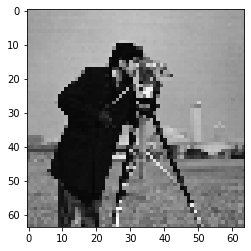

In [4]:
plt.imshow(im, cmap='gray')

In [5]:
from gspy.create import make_grid

N, M = im.shape
A, coords = make_grid(N, M)

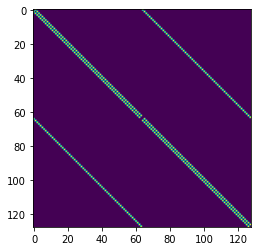

In [8]:
plt.imshow(A[:128, :128])

In [25]:
D = np.diag(np.sum(A, axis=1))
L = D - A
eigvals, U = np.linalg.eig(L)

Uinv = np.linalg.inv(U)

In [30]:
x = x.reshape((64 * 64, 1))
xx = Uinv @ x

In [53]:
def reconstruct_from_p(x, U, Uinv, p):
    x = x.reshape((64 * 64, 1))
    xx = Uinv @ x
    idx = np.argsort(np.abs(xx).ravel())[::-1]
    out = U[:, idx[:p]] @ xx[idx[:p]]
    return out

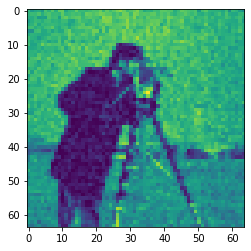

In [57]:
xr = reconstruct_from_p(x, U, Uinv, p=1000)
imr = xr.reshape((64, 64))
plt.imshow(np.abs(imr))

In [72]:
ares = list()
ps = np.arange(5, len(U), int(len(U) / 50))

def l2norm(x):
    return np.sqrt(np.sum((np.abs(x))**2))

def are(x, xr):
    return l2norm(x - xr) / l2norm(x)

for p in ps:
    xr = reconstruct_from_p(x, U, Uinv, p=p)
    ares.append(are(x, xr))

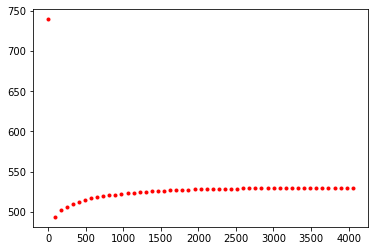

In [73]:
plt.plot(ps, ares, 'r.')

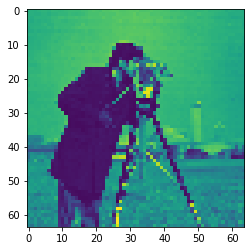

In [69]:
x = im.ravel()
plt.imshow(x.reshape((64, 64)))